# Zoo Animal Classification 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
#matplotlib inline

# 1. Read Data

In [2]:
#Zoo Dataset is originally provided by the UCI Machine Learning Repository.
animal = pd.read_csv(r"\Users\Kaustav Dutta\Desktop\zoo.csv")       
animal.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
animal.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


# 2. Data Prepocessing

  * Evaluate the missing values and duplicates
  * Set the features and target
  * Check data type
  * Train-Test-Split

In [4]:
#check if there is null value
animal.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [5]:
print(animal.class_type.unique())

[1 4 2 7 6 5 3]


In [6]:
duplicates = animal.duplicated()
duplicates[duplicates > 1]

Series([], dtype: bool)

In [7]:
#check if there are duplicates in animal_name
duplicates = animal.animal_name.value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal_name, dtype: int64

In [8]:
#select these duplicates frog to see the data

frog = animal.loc[animal['animal_name'] == 'frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [9]:
#find that one frog is venomous and another one is not
#change the venomous one into venoumous_frog to seperate 2 kinds of frog
animal['animal_name'][(animal.venomous == 1 )& (animal.animal_name == 'frog')] = "venoumous_frog"

C:\Users\Kaustav Dutta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# Join animal table and class table to show actual class names
ani_class = pd.read_csv(r"\Users\Kaustav Dutta\Desktop\class.csv")   
df = pd.merge(animal,ani_class,how='left',left_on='class_type',right_on='Class_Number')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


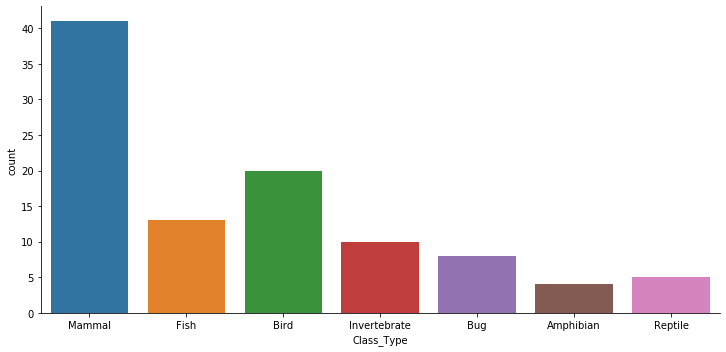

In [15]:
#use seaborn to plot the number of each class_type
sns.catplot('Class_Type', data=df, kind="count",height = 5,aspect = 2)

In [12]:
#train test split into 80/20
from sklearn.model_selection import train_test_split
X = animal.iloc[:,1:17]
y = animal.iloc[:,17]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# 3. Training and testing the data

* Decision Tree
* Random Forest
* Perceptron
* Support Vector Machine
* K-Nearest Neighbors


## 1) Decision Tree Classification

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Declare and train the model
clf = DecisionTreeClassifier(random_state = 0,criterion='gini')
clf.fit(X_train, y_train)

y_pred_DecisionTreeClassifier = clf.predict(X_test)

scores = []
score = accuracy_score(y_pred_DecisionTreeClassifier,y_test)
scores.append(score)

global tree  
# Get the tree
tree = []
tree = clf

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=["1","2","3","4","5","6","7" ],
                           feature_names=X.columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png())

In [21]:
#use cross validation score since this is a small size dataset 
from sklearn.model_selection import cross_val_score
score_tree=cross_val_score(clf, X,y, cv=10)
score_tree

C:\Users\Kaustav Dutta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


array([1.        , 0.91666667, 0.91666667, 0.90909091, 0.8       ,
       0.88888889, 1.        , 1.        , 1.        , 1.        ])

In [22]:
cv_scores = []
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (score_tree.mean(), score_tree.std() * 2))
cv_score = score_tree.mean()
cv_scores.append(cv_score)

Decision Tree Accuracy: 0.94 (+/- 0.13)


## 2) Random Forest Classifier

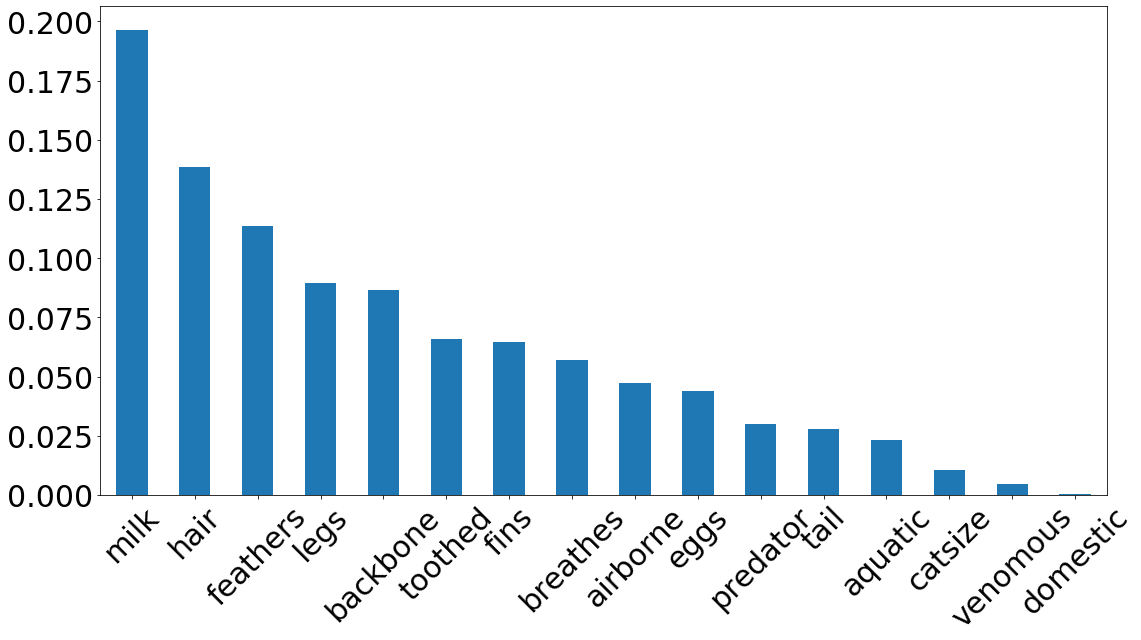

In [23]:
from sklearn.ensemble import RandomForestClassifier


# Declare and train the model
clf = RandomForestClassifier(random_state = 0,n_estimators=25, n_jobs = 2)
clf.fit(X_train, y_train)
y_pred_RandomForestClassifier = clf.predict(X_test)
#Get Accuracy Score
score = accuracy_score(y_pred_RandomForestClassifier,y_test)
scores.append(score)

global importances
# Get the feature importances
importances = []
importances = clf.feature_importances_


# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

In [24]:
#Get cross validation score of random forest model
score_forest=cross_val_score(clf, X,y, cv=10)
score_forest
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (score_forest.mean(), score_forest.std() * 2))
cv_score = score_forest.mean()
cv_scores.append(cv_score)

C:\Users\Kaustav Dutta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Random Forest Accuracy: 0.96 (+/- 0.09)


In [ ]:
from sklearn.linear_model import Perceptron

# Declare the model
clf = Perceptron(n_iter=40, eta0=0.1, random_state=0)

# Train the model
clf.fit(X_train, y_train)
y_pred_Perceptron = clf.predict(X_test)
#Get Accuracy Score
score = accuracy_score(y_pred_Perceptron,y_test)
scores.append(score)

## 3) Perceptron Model

In [27]:
#Get cross validation score of Perceptron
score_perceptron=cross_val_score(clf, X,y, cv=10)
score_perceptron
print("Perceptron Accuracy: %0.2f (+/- %0.2f)" % (score_perceptron.mean(), score_perceptron.std() * 2))
cv_score = score_perceptron.mean()
cv_scores.append(cv_score)

C:\Users\Kaustav Dutta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Perceptron Accuracy: 0.96 (+/- 0.09)


## 4) Support Vector Machine

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Declare the model
svm = SVC(kernel='linear', C=0.2, random_state=0)

# Train the model
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

#Get Accuracy Score
score = accuracy_score(y_pred_svm,y_test)
scores.append(score)

In [30]:
#Get cross validation score of Support Vector Machine
score_svm=cross_val_score(svm, X,y, cv=10)
print("Support Vector Machine Accuracy: %0.2f (+/- %0.2f)" % (score_svm.mean(), score_svm.std() * 2))
cv_score = score_svm.mean()
cv_scores.append(cv_score)

Support Vector Machine Accuracy: 0.96 (+/- 0.10)


C:\Users\Kaustav Dutta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


## 5) K-Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier
# Declare the model
clf = KNeighborsClassifier(n_neighbors=5)

# Train the model
clf.fit(X_train, y_train)
y_pred_KNeighborsClassifier = clf.predict(X_test)
#Get Accuracy Score
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scores.append(score)

In [32]:
#Get cross validation score of K-Nearest Neighbors
score_knn=cross_val_score(clf, X,y, cv=10)
print("Support Vector Machine Accuracy: %0.2f (+/- %0.2f)" % (score_knn.mean(), score_knn.std() * 2))
cv_score = score_knn.mean()
cv_scores.append(cv_score)

Support Vector Machine Accuracy: 0.90 (+/- 0.14)


C:\Users\Kaustav Dutta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


# 4. Battle of Algorithms

## 1) Accuracy Score

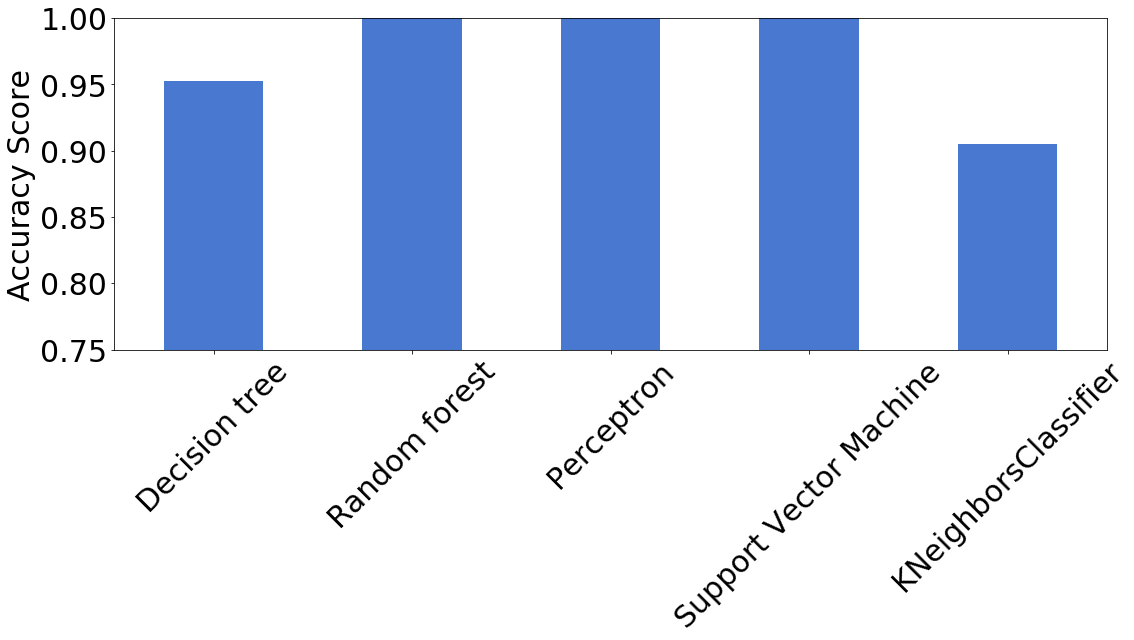

In [33]:
# Convert the Accuracy Scores into one-dimensional 1darray with corresponding classifier names as axis labels

Acc_scores = pd.Series(scores, ['Decision tree', 'Random forest','Perceptron','Support Vector Machine',
                                  'KNeighborsClassifier'])

current_palette = sns.color_palette("muted", n_colors=5)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
#colors = np.random.randint(0,5,5)

# Make the bar Plot from f_importances 
Acc_scores.plot(x='Classifiers', y='Accuracy scores',kind = 'bar',figsize=(16,9), rot=45, fontsize=30, colormap=cmap)
#plt.bar(fscores,clfs)
plt.xlabel('', fontsize=30)
plt.ylabel('Accuracy Score', fontsize=30)
plt.ylim([0.75,1])
# Show the plot
plt.tight_layout()
plt.show()

## 2) Cross Validation Score

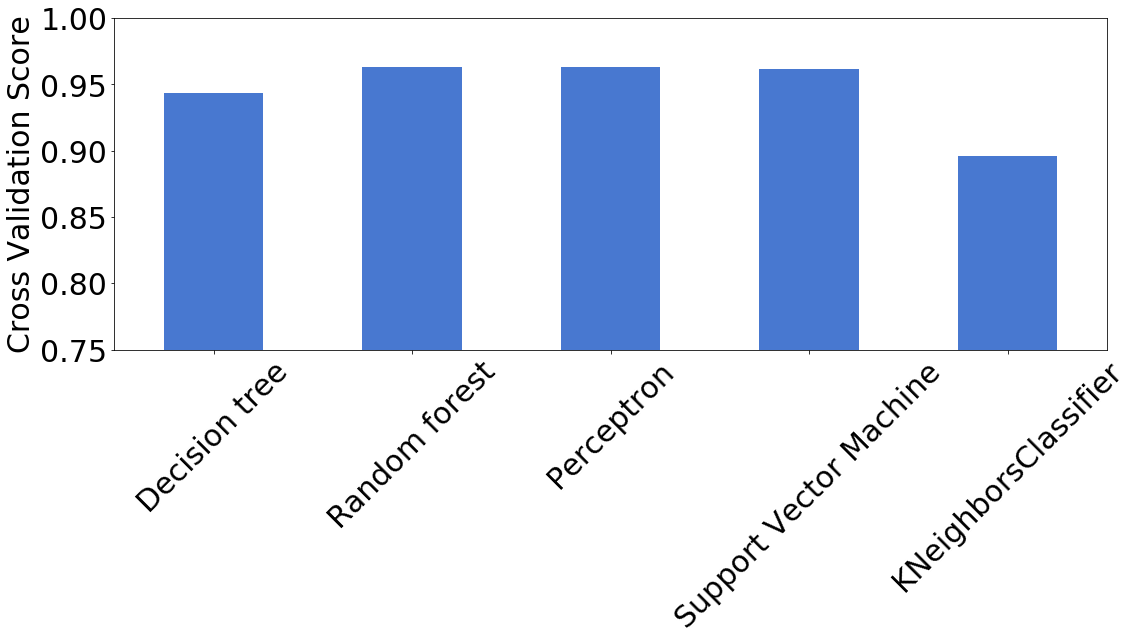

In [34]:
# Convert the Cross Validation scores into one-dimensional 1darray with corresponding classifier names as axis labels

clf_scores = pd.Series(cv_scores, ['Decision tree', 'Random forest','Perceptron','Support Vector Machine',
                                  'KNeighborsClassifier'])

current_palette = sns.color_palette("muted", n_colors=5)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
#colors = np.random.randint(0,5,5)

# Make the bar Plot from f_importances 
clf_scores.plot(x='Classifiers', y='Cross Validation scores',kind = 'bar',figsize=(16,9), 
                rot=45, fontsize=30, colormap=cmap)
#plt.bar(fscores,clfs)
plt.xlabel('', fontsize=30)
plt.ylabel('Cross Validation Score', fontsize=30)
plt.ylim([0.75,1])
# Show the plot
plt.tight_layout()
plt.show()